# EC2 Instance Set-Up

**NOTE** : When we set up the EC2 instance and configure the security groups setting for these spot instances we keep all the ports are open for simplicity, but it should be noted that these settings should be much more strict if put in production. So keep that in mind if you want to use the concepts discussed in the next lecture for a formal production environment.

## Intro
- Now that we have our AWS account we will move towards creating an EC2 instance.
- Amazon Elastic Compute Cloud (EC2) is a web service that provides scalable compute capacity in the cloud.
- We  can basically think of it as a virtual computer we can access through ssh/internet.


## Plan
- Create an EC2 instance on AWS
- Use SSH to connect to EC2 over internet
- Understand how to connect using windows using PuTTY
- Set-up Jupyter and Spark on EC2 instance
![image.png](https://i.imgur.com/pziNzZZ.png)

### SSH - Secure Shell Connection
Secure Shell is a cryptographic network protocol for operating network services securely over an unsecured network. Typical applications include remote command-line login and remote command execution, but any network service can be secured with SSH.
![image.png](https://i.imgur.com/mWSUe7k.png)

- Our goal here is to connect to the command line of our virtual machine on Amazon EC2.
- We will see how to do it using PuTTY in windows, and it is much easier for Mac and Linux as ssh is built-in those 2 OS's. So it's just a matter of a couple of commands for Linux and Mac.

# Steps :
1. Sign in to your AWS console at aws.amazon.com.
2. After logging in you will see something like this, and I have pointed towards EC2 instances, for your ease :
![image.png](https://i.imgur.com/1BiVQNe.png)

3. After clicking on Launch a virtual machine with EC2 we see the following screen to choose Amazon Machine Image AMI, click Select on Ubuntu, see free tier eligible is written below the logo :
![image.png](https://i.imgur.com/XZw0iFW.png)

4. After that you will see a screen where you choose your instance, select t2.micro here and press "Next : Configure Instance Details"
![image.png](https://i.imgur.com/FjN6kIb.png)

5. Next in number of instances select it as 1, as discussed earlier in Spark and other distributed systems, we may have a cluster of instances.
    - Dealing with huge datasets indeed requires putting in more than one instances.
    - As we want our trial AWS EC2 instance to be free so we select only 1 instance.
    - Everything else can be default and press Next : Add Storage
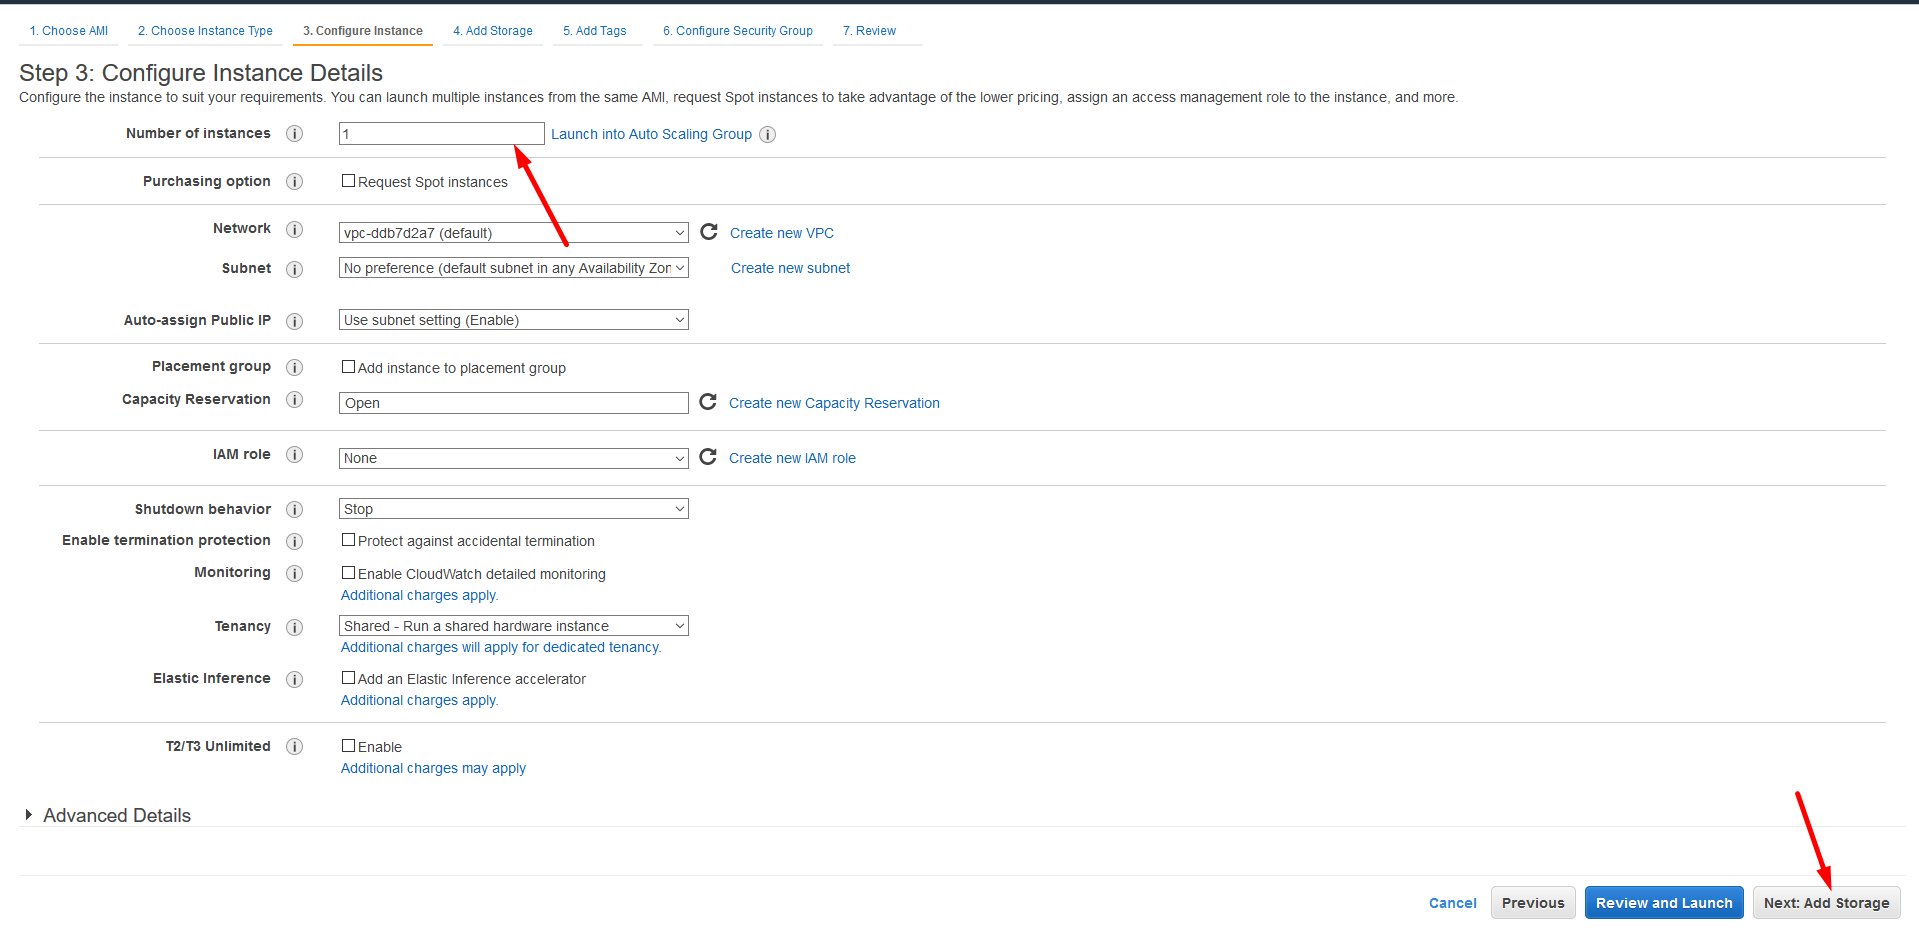

6. Default storage is 8 GB, let it be and click Next : Add Tags
![image.png](https://i.imgur.com/vizxDLb.png)

7. Now this step in our process doesn't really matters, but if you do enter key and value, remember what you entered in both fields. We won't be writing anything here.
![image.png](https://i.imgur.com/1y6x4Ag.png)

8. Now in security group select type as following and press Review and Launch.
![image.png](https://i.imgur.com/jik6qJJ.png)

9. Next we press review and launch, and we see that there is a warning, saying our instance is open to the world.
    - Do not worry about that for now as we want to access our instance easily,and if you are using it in production then you might want to change these settings, we have kept things open and simple here so that we do not face any blockages, or other issues while we try to establish Jupyter notebook on EC2 instance.
![image.png](https://i.imgur.com/4HPafaM.png)

## NOTE : **IMPORTANT**
After reviewing click launch. You'll see a window where you select a key pair or create an existing key pair.
- Go ahead and click on create a new key pair.
- Give a name to key pair. 
- Click Download Key Pair. This step is incredibly important. **Be sure that you have this key pair file with an extension of .pem with you before proceeding further.** As you won't be able to download this file again after this window.

- **Failing to do the step above means you have to start all over again. So do it CAREFULLY! There is no coming back to this step.**

![image.png](https://i.imgur.com/c6RhUUU.png)


Next you will get this screen : 
![image.png](https://i.imgur.com/OTaIX5E.png)

Click on instance id and you will be redirected to your newly created EC2 instance.
![image.png](https://i.imgur.com/bavcrJn.png)

- A look at the instance created : 
Your instance state may show pending for maximum 3-4 minutes, but it will turn to green soon. Which means your EC2 is now working with Ubuntu on it.
![image.png](https://i.imgur.com/UyvBMhU.png)

## IMPORTANT : Stopping your instance

- Click on Actions >> Instance State >> Stop after you are done using AWS EC2 instance you just set up to avoid getting charged. 
![image.png](https://i.imgur.com/xVZMkmT.png)

**TERMINATE means deleting your instance and this is irrecoverable and removes everything on an instance.**

# SSH Connecting to EC2 Instance : Windows

**Resource :**
[Refer to this link for official documentation to Connecting to Your Linux Instance from Windows Using PuTTY - AWS ](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/putty.html)

## Steps :

### Prerequisites :
- Install PuTTY on your local computer. Download and install PuTTY from the [PuTTY download page.](http://www.chiark.greenend.org.uk/~sgtatham/putty/) If you already have an older version of PuTTY installed, we recommend that you download the latest version. Be sure to install the entire suite.
- Convert your private key using PuTTYgen.
- PuTTY does not natively support the private key format (.pem) generated by Amazon EC2. PuTTY has a tool named PuTTYgen, which can convert keys to the required PuTTY format (.ppk). You must convert your private key into this format (.ppk) before attempting to connect to your instance using PuTTY.
    - To convert your private key:
        1. Start PuTTYgen (for example, from the Start menu, choose All Programs > PuTTY > PuTTYgen).
        2. Under Type of key to generate, choose RSA. ![image.png](https://i.imgur.com/tODwgzl.png)

        3. Choose Load. By default, PuTTYgen displays only files with the extension .ppk. To locate your .pem file, select the option to display files of all types. 
![image.png](https://i.imgur.com/chgfzRb.png)

4. Select your .pem file for the key pair that you specified when you launched your instance, and then choose Open. Choose OK to dismiss the confirmation dialog box.

5. Choose Save private key to save the key in the format that PuTTY can use. PuTTYgen displays a warning about saving the key without a passphrase. Choose Yes. 

Note
    A passphrase on a private key is an extra layer of protection, so even if your private key is discovered, it can't be used without the passphrase. The downside to using a passphrase is that it makes automation harder because human intervention is needed to log on to an instance, or copy files to an instance.

6. Specify the same name for the key that you used for the key pair (for example, my-key-pair). PuTTY automatically adds the .ppk file extension.

Your private key is now in the correct format for use with PuTTY. You can now connect to your instance using PuTTY's SSH client.

## Connecting to Your Windows Instance

1. Start PuTTY (from the Start menu, choose All Programs, PuTTY, PuTTY).
- In the Category pane, choose Session and complete the following fields:
    - In the Host Name box, enter ubuntu@public_dns_name. Be sure to specify the appropriate user name for your AMI. For example:

PUBLIC DNS NAME : 
![image.png](https://i.imgur.com/HgZEOGU.png)

### Names for different AMI

- For Amazon Linux 2 or the Amazon Linux AMI, the user name is ec2-user.

- For a CentOS AMI, the user name is centos.

- For a Debian AMI, the user name is admin or root.

- For a Fedora AMI, the user name is ec2-user or fedora.

- For a RHEL AMI, the user name is ec2-user or root.

- For a SUSE AMI, the user name is ec2-user or root.

- For an Ubuntu AMI, the user name is ubuntu.

- Otherwise, if ec2-user and root don't work, check with the AMI provider.

3. Under Connection type, select SSH.
4. Ensure that Port is 22.
![image.png](https://i.imgur.com/BXiagSv.png)

5. (Optional) You can configure PuTTY to automatically send 'keepalive' data at regular intervals to keep the session active. This is useful to avoid disconnecting from your instance due to session inactivity. In the Category pane, choose Connection, and then enter the required interval in the Seconds between keepalives field. For example, if your session disconnects after 10 minutes of inactivity, enter 180 to configure PuTTY to send keepalive data every 3 minutes.

### Authentication

- In the Category pane, expand Connection, expand SSH, and then choose Auth. Complete the following:
    - Choose Browse.
    - Select the .ppk file that you generated for your key pair, and then choose Open.
    - (Optional) If you plan to start this session again later, you can save the session information for future use. Choose Session in the Category tree, enter a name for the session in Saved Sessions, and then choose Save.
    - Choose Open to start the PuTTY session.

![image.png](https://i.imgur.com/zWAtOxn.png)

- After clicking open you will get this prompt, press Yes, since we do not have any risk from this machine as we just created this.
![image.png](https://i.imgur.com/0O3aLhq.png)

- Upon successful connection we will get the screen shown below :
![image.png](https://i.imgur.com/PCDAReJ.png)

- Run a sudo apt-get update after you connect for first time.
- Run sudo apt install neofetch/ screenfetch to quickly get a summary of your EC2 instance which looks like this :
![image.png](https://i.imgur.com/QV0FfF8.png)

## (Optional) Fingerprint verification :

- (Optional) Verify that the fingerprint in the security alert dialog box matches the fingerprint that you previously obtained in (Optional) Get the Instance Fingerprint. If these fingerprints don't match, someone might be attempting a "man-in-the-middle" attack. If they match, continue to the next step.


- Firstly, install AWS CLI from [this link](https://docs.aws.amazon.com/cli/latest/userguide/install-windows.html)
- sudo apt install awscli for Linux
### Steps :
- **Get the Instance Fingerprint :** To protect yourself from man-in-the-middle attacks, you can verify the RSA key fingerprint when you connect to your instance. Verifying the fingerprint is useful if you've launched your instance from a public AMI from a third party.

- First you get the instance fingerprint. Then, when you connect to the instance, you are prompted to verify the fingerprint. You can compare the fingerprint you obtained with the fingerprint displayed for verification. If these fingerprints don't match, someone might be attempting a "man-in-the-middle" attack. If they match, you can confidently connect to your instance.

**Prerequisites for getting the instance fingerprint:**
- To get the instance fingerprint, you must use the AWS CLI. For information about installing the AWS CLI, see [nstalling the AWS Command Line Interface](https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-getting-set-up.html) the AWS Command Line Interface User Guide.

- The instance must be in the running state, not the pending state.

- To get the instance fingerprint

- On your local computer (not on the instance), use the get-console-output (AWS CLI) command to obtain the fingerprint, as follows:

```aws ec2 get-console-output --instance-id instance_id```

# SSH with MAC or Linux :

- Skip this section if you are on Windows, you should have connected to your instance already from previous lecture.
- We have created our instance already from previous lecture.
- We created our instance using AWS console.
- We downloaded the .pem file.
- Now we connect to our instance through our terminal using SSH.
- Make sure you have your terminal/bash in the same directory where .pem file is located.
- Keep DNS address handy of your instance.
- Open your terminal and let's get started.

## Steps :
1. Run chmod command to make sure private key file isn't publicly available.
    ```chmod 400 key_name.pem```
Getting no output means command worked properly.
![image.png](https://i.imgur.com/q8kYPEK.png)

2. Use SSH command to connect to our instance.
```ssh -i  aws_vit.pem ubuntu@PublicDNS```
![image.png](https://i.imgur.com/WxFGPU7.png)

3. Press yes and enter on the prompt.
![image.png](https://i.imgur.com/GL5t4Xb.png)
4. Now you are logged in to the command line interface of EC2 instance.Virtual connection to EC2 instance.

# Up Next :
- Using CLI to download anaconda, spark, py4j,scala,Hadoop,jre, and setting up the entire jupyter notebook on EC2 instance.